# Importing Useful Python libraries.

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Reading the CSV file (Dataset)

In [51]:
df = pd.read_csv("flood_data_with_missing.csv")
df

,Rainfall,River_Level,Soil_Moisture,Flood
0,152.0,5.28,46.0,0
1,229.0,7.80,45.0,0
2,142.0,7.28,66.0,0
3,64.0,14.92,75.0,0
4,156.0,3.46,82.0,0
...,...,...,...,...
395,148.0,8.48,84.0,0
396,202.0,5.98,70.0,0
397,142.0,13.52,72.0,0
398,195.0,2.80,55.0,1


# EDA of DATASET

In [52]:
print("\n--- Dataset Info ---")
print(df.info())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rainfall       385 non-null    float64
 1   River_Level    385 non-null    float64
 2   Soil_Moisture  385 non-null    float64
 3   Flood          400 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 12.6 KB
None


In [53]:
print("\n--- Dataset Description ---")
print(df.describe())


--- Dataset Description ---
         Rainfall  River_Level  Soil_Moisture      Flood
count  385.000000   385.000000     385.000000  400.00000
mean   179.254545     8.011169      53.924675    0.23000
std     71.466722     3.994086      20.240019    0.42136
min     50.000000     1.070000      20.000000    0.00000
25%    120.000000     4.640000      37.000000    0.00000
50%    179.000000     7.940000      54.000000    0.00000
75%    240.000000    11.320000      71.000000    0.00000
max    299.000000    14.940000      89.000000    1.00000


In [54]:
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
Rainfall         15
River_Level      15
Soil_Moisture    15
Flood             0
dtype: int64


In [55]:
data = df.dropna()
data

,Rainfall,River_Level,Soil_Moisture,Flood
0,152.0,5.28,46.0,0
1,229.0,7.80,45.0,0
2,142.0,7.28,66.0,0
3,64.0,14.92,75.0,0
4,156.0,3.46,82.0,0
...,...,...,...,...
395,148.0,8.48,84.0,0
396,202.0,5.98,70.0,0
397,142.0,13.52,72.0,0
398,195.0,2.80,55.0,1


# Dataset Visualization

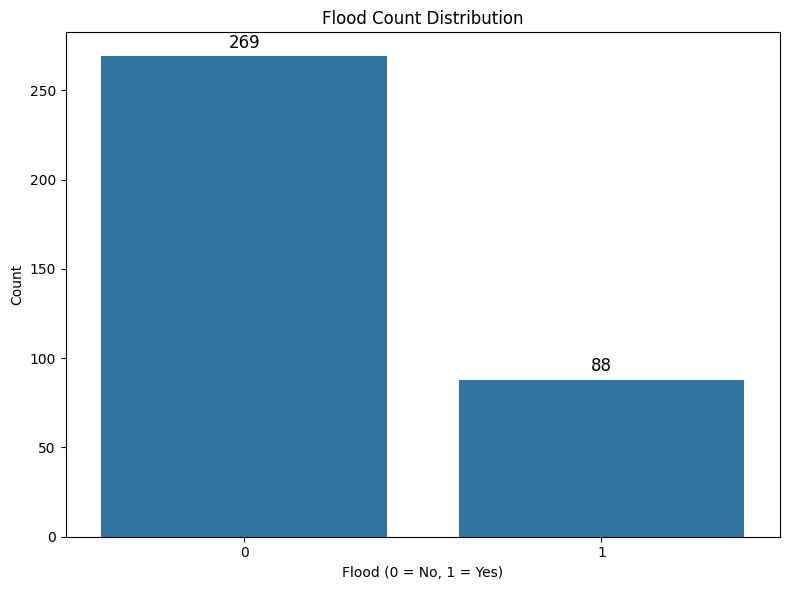

In [56]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="Flood", data=data)
plt.title("Flood Count Distribution")
plt.xlabel("Flood (0 = No, 1 = Yes)")
plt.ylabel("Count")


for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3, fontsize=12)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

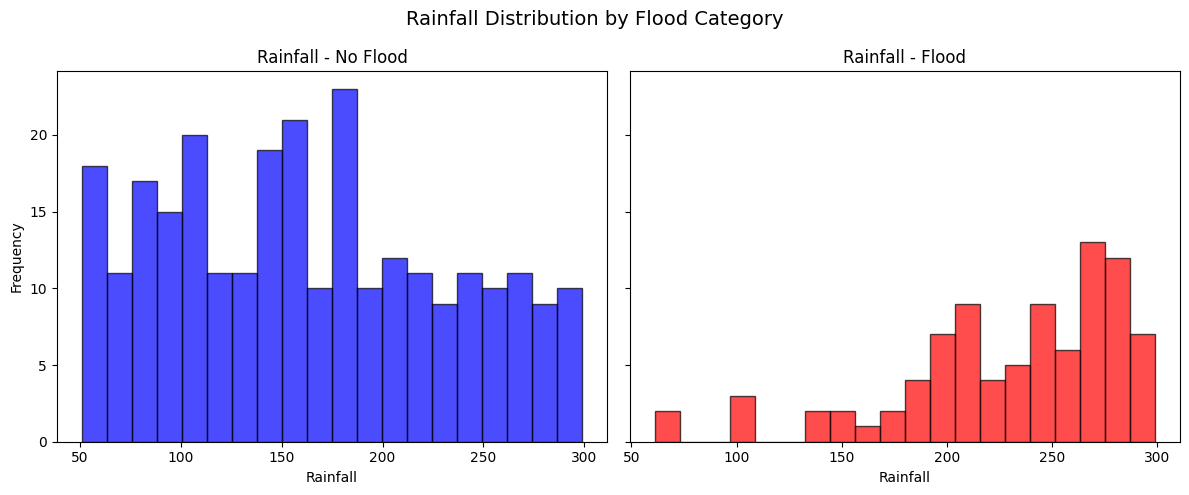

In [57]:
plt.figure(figsize=(12, 6))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)


ax1.hist(data[data['Flood'] == 0]['Rainfall'], bins=20, alpha=0.7, color='blue',edgecolor='black')
ax1.set_title('Rainfall - No Flood')
ax1.set_xlabel('Rainfall')
ax1.set_ylabel('Frequency')


ax2.hist(data[data['Flood'] == 1]['Rainfall'], bins=20, alpha=0.7, color='red',edgecolor='black')
ax2.set_title('Rainfall - Flood')
ax2.set_xlabel('Rainfall')

plt.suptitle("Rainfall Distribution by Flood Category", fontsize=14)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

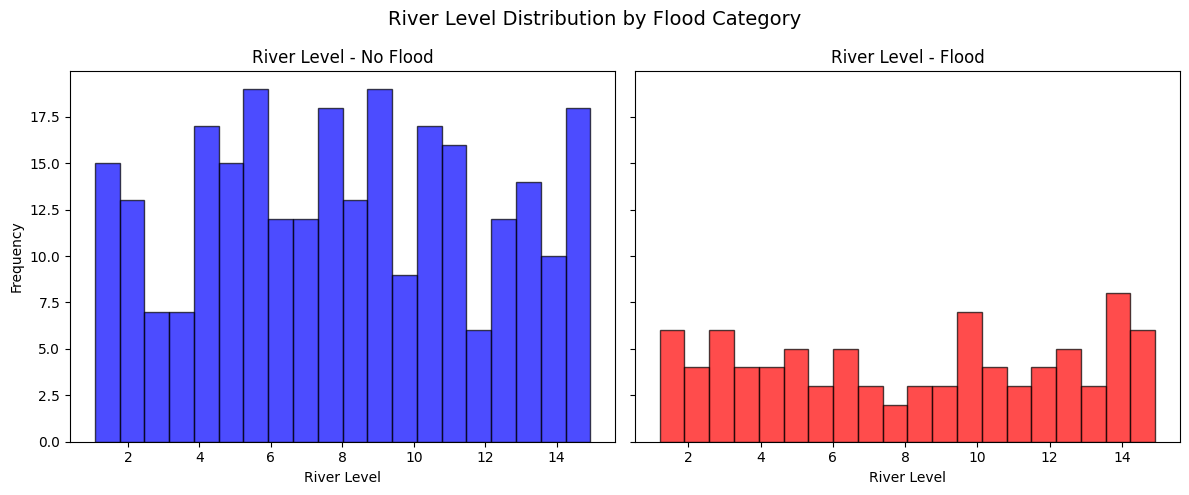

In [58]:
plt.figure(figsize=(12, 6))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)


ax1.hist(data[data['Flood'] == 0]['River_Level'], bins=20, alpha=0.7, color='blue', edgecolor='black')
ax1.set_title('River Level - No Flood')
ax1.set_xlabel('River Level')
ax1.set_ylabel('Frequency')


ax2.hist(data[data['Flood'] == 1]['River_Level'], bins=20, alpha=0.7, color='red', edgecolor='black')
ax2.set_title('River Level - Flood')
ax2.set_xlabel('River Level')

plt.suptitle("River Level Distribution by Flood Category", fontsize=14)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

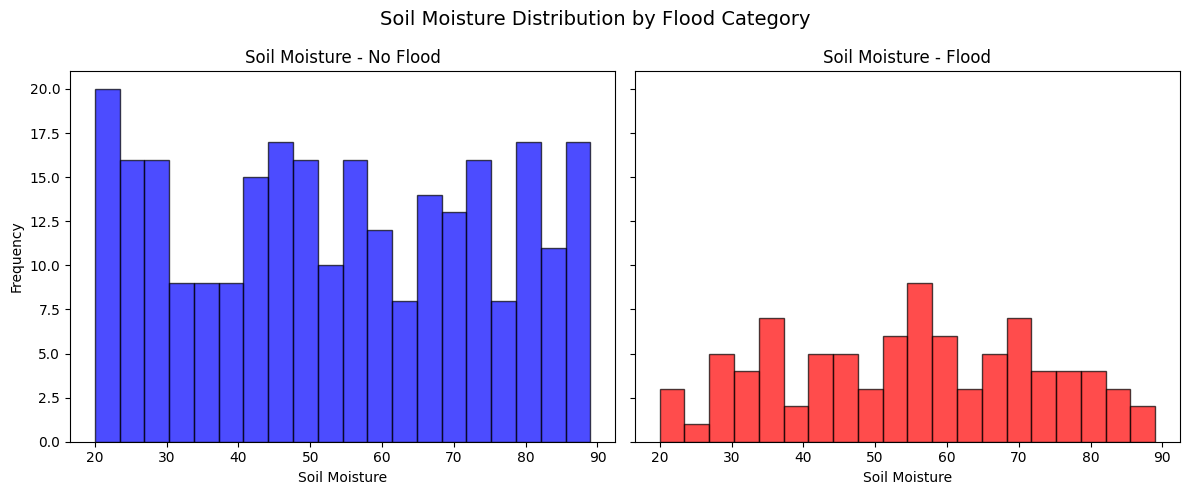

In [59]:
plt.figure(figsize=(12, 6))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)


ax1.hist(data[data['Flood'] == 0]['Soil_Moisture'], bins=20, alpha=0.7, color='blue', edgecolor='black')
ax1.set_title('Soil Moisture - No Flood')
ax1.set_xlabel('Soil Moisture')
ax1.set_ylabel('Frequency')


ax2.hist(data[data['Flood'] == 1]['Soil_Moisture'], bins=20, alpha=0.7, color='red', edgecolor='black')
ax2.set_title('Soil Moisture - Flood')
ax2.set_xlabel('Soil Moisture')

plt.suptitle("Soil Moisture Distribution by Flood Category", fontsize=14)
plt.tight_layout()
plt.show()

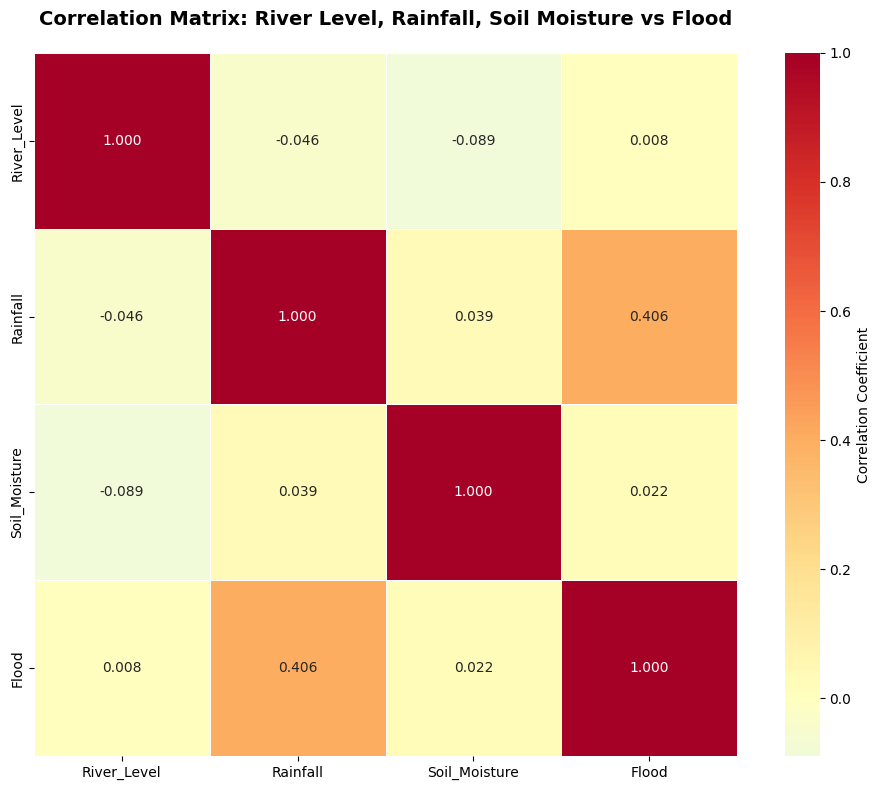

In [60]:

heatmap_data = data[['River_Level', 'Rainfall', 'Soil_Moisture', 'Flood']]


correlation_matrix = heatmap_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdYlBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix: River Level, Rainfall, Soil Moisture vs Flood', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Feature Selection and spiliting the data into Train and Test

In [61]:

X = df[["Rainfall", "River_Level", "Soil_Moisture"]]
y = df["Flood"]

In [62]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Looking for the test and train data shape

In [63]:
X_train.shape


(280, 3)

In [64]:
X_test.shape

(120, 3)

In [65]:
y_train.shape

(280,)

In [66]:
y_test.shape

(120,)

In [67]:
X_train


,Rainfall,River_Level,Soil_Moisture
157,211.0,10.12,72.0
109,264.0,7.19,59.0
17,153.0,14.70,45.0
347,234.0,7.72,86.0
24,285.0,13.10,37.0
...,...,...,...
71,102.0,13.41,25.0
106,64.0,10.64,63.0
270,235.0,3.33,47.0
348,266.0,6.89,31.0


In [68]:
X_test

,Rainfall,River_Level,Soil_Moisture
209,209.0,3.98,42.0
280,130.0,6.52,75.0
33,107.0,13.37,44.0
210,120.0,14.25,66.0
93,103.0,10.79,33.0
...,...,...,...
60,122.0,5.15,NaN
79,57.0,12.75,27.0
285,269.0,6.44,68.0
305,233.0,3.31,29.0


In [69]:
y_train

157    1
109    1
17     0
347    0
24     1
      ..
71     0
106    0
270    1
348    0
102    0
Name: Flood, Length: 280, dtype: int64

In [70]:
y_test

209    0
280    0
33     0
210    0
93     0
      ..
60     0
79     0
285    1
305    1
281    0
Name: Flood, Length: 120, dtype: int64

## Training the model

In [71]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

## Checking the Accuracy of the Trained Model

In [72]:
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 0.6916666666666667


## Taking User Input 

In [73]:
rainfall = float(input("Enter rainfall (mm): "))
river_level = float(input("Enter river level (m): "))
soil_moisture = float(input("Enter soil moisture (%): "))

## Predicting Outcome 

In [74]:
user_data = [[rainfall, river_level, soil_moisture]]
prediction = model.predict(user_data)

if prediction[0] == 1:
    print("⚠️ Flood predicted in this area!")
else:
    print("✅ No flood predicted.")

✅ No flood predicted.


C:\Users\xorta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
